# Random walks

In [1]:
jump() = rand( (-1, +1) )

jump (generic function with 1 method)

In [6]:
jump()

1

In [7]:
bernoulli(p) = rand() < p

bernoulli (generic function with 1 method)

## Random walks

In [8]:
[jump() for i in 1:10]

10-element Array{Int64,1}:
  1
  1
  1
 -1
 -1
  1
 -1
  1
  1
  1

In [9]:
function walk(n, x=0)
    
    for i in 1:n
        x += jump()
    end
    
    return x
end

walk (generic function with 2 methods)

In [21]:
walk(10)

-4

In [49]:
function trajectory(n, x=0)
    
    xs = [x]
    
    for i in 1:n-1
        x += jump()
        push!(xs, x)
    end
    
    return xs
end

trajectory (generic function with 2 methods)

In [50]:
trajectory(10)

10-element Array{Int64,1}:
  0
 -1
  0
  1
  2
  3
  2
  3
  4
  5

## Plotting

In [51]:
traj = trajectory(100)

100-element Array{Int64,1}:
  0
  1
  2
  3
  4
  3
  2
  3
  4
  3
  4
  5
  6
  ⋮
 10
 11
 10
  9
  8
  7
  6
  7
  8
  9
 10
  9

In [52]:
using Plots

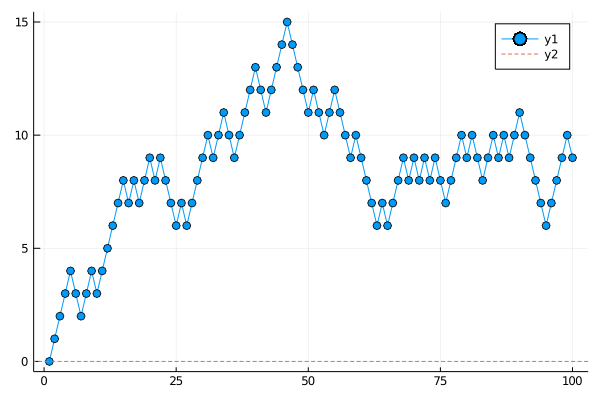

In [53]:
plot(traj, m=:o)

hline!([0], ls=:dash)

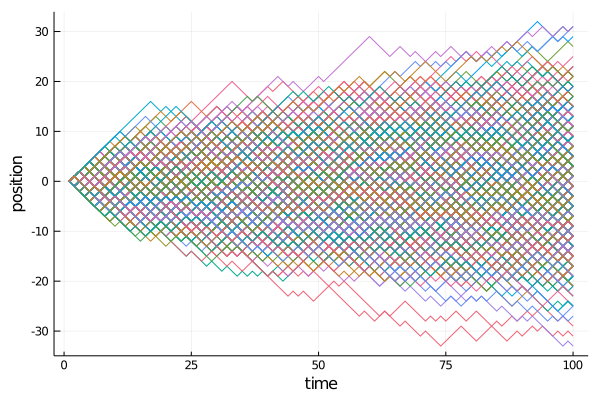

In [54]:
num_trajs = 1000
num_steps = 100

p = plot()
ylabel!("position")
xlabel!("time")

for i in 1:num_trajs
    traj = trajectory(num_steps)
    plot!(traj, leg=:false)
end

p

## Precompute the data

In [55]:
n = 20
traj = trajectory(n)

@manipulate for i in slider(1:n, value=1)
    plot(traj[1:i], leg=:false)
    xlims!(0, length(traj))
    ylims!(minimum(traj), maximum(traj))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 20,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\lxiong\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\lxiong\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\lxiong\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\lxiong\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\lxiong\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000136c05d0, Task (runnable) @0x00000000136c05d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\"],\"changes\":WebIO.getval({\"name\":\"changes\",\

## Plot multiple trajectories

In [56]:
n = 20

walkers = [trajectory(n) for i in 1:10] 

10-element Array{Array{Int64,1},1}:
 [0, -1, -2, -3, -2, -3, -2, -1, -2, -3, -2, -1, -2, -1, 0, 1, 2, 3, 4, 5]
 [0, 1, 2, 3, 4, 5, 4, 5, 6, 7, 8, 9, 10, 9, 10, 11, 12, 13, 14, 13]
 [0, 1, 2, 1, 2, 1, 2, 1, 0, -1, 0, 1, 0, -1, -2, -1, 0, 1, 0, 1]
 [0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 4, 3, 4, 3, 4, 5, 4, 3]
 [0, -1, 0, -1, -2, -3, -4, -3, -2, -1, -2, -3, -2, -1, -2, -1, -2, -1, -2, -3]
 [0, 1, 0, -1, -2, -3, -4, -5, -6, -5, -4, -5, -4, -5, -4, -3, -2, -3, -2, -1]
 [0, 1, 0, -1, -2, -3, -4, -5, -4, -5, -4, -3, -4, -3, -2, -1, -2, -3, -4, -5]
 [0, 1, 0, -1, -2, -3, -2, -3, -4, -3, -2, -1, 0, -1, -2, -1, 0, 1, 0, -1]
 [0, -1, 0, 1, 0, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 4, 5, 4, 5]
 [0, 1, 0, 1, 0, 1, 0, -1, -2, -1, 0, 1, 0, -1, 0, -1, -2, -3, -4, -3]

In [59]:
last_positions = [traj[end] for traj in walkers]

10-element Array{Int64,1}:
  5
 13
  1
  3
 -3
 -1
 -5
 -1
  5
 -3

Or convert vector of vectors into a matrix:

In [60]:
hcat(walkers...) # "splat"

20×10 Array{Int64,2}:
  0   0   0  0   0   0   0   0   0   0
 -1   1   1  1  -1   1   1   1  -1   1
 -2   2   2  0   0   0   0   0   0   0
 -3   3   1  1  -1  -1  -1  -1   1   1
 -2   4   2  2  -2  -2  -2  -2   0   0
 -3   5   1  1  -3  -3  -3  -3   1   1
 -2   4   2  2  -4  -4  -4  -2   2   0
 -1   5   1  1  -3  -5  -5  -3   3  -1
 -2   6   0  2  -2  -6  -4  -4   2  -2
 -3   7  -1  1  -1  -5  -5  -3   1  -1
 -2   8   0  2  -2  -4  -4  -2   2   0
 -1   9   1  3  -3  -5  -3  -1   3   1
 -2  10   0  4  -2  -4  -4   0   2   0
 -1   9  -1  3  -1  -5  -3  -1   3  -1
  0  10  -2  4  -2  -4  -2  -2   2   0
  1  11  -1  3  -1  -3  -1  -1   3  -1
  2  12   0  4  -2  -2  -2   0   4  -2
  3  13   1  5  -1  -3  -3   1   5  -3
  4  14   0  4  -2  -2  -4   0   4  -4
  5  13   1  3  -3  -1  -5  -1   5  -3

In [62]:
walkers_matrix = reduce(hcat, walkers) # more efficient when you have a lot of vectors

20×10 Array{Int64,2}:
  0   0   0  0   0   0   0   0   0   0
 -1   1   1  1  -1   1   1   1  -1   1
 -2   2   2  0   0   0   0   0   0   0
 -3   3   1  1  -1  -1  -1  -1   1   1
 -2   4   2  2  -2  -2  -2  -2   0   0
 -3   5   1  1  -3  -3  -3  -3   1   1
 -2   4   2  2  -4  -4  -4  -2   2   0
 -1   5   1  1  -3  -5  -5  -3   3  -1
 -2   6   0  2  -2  -6  -4  -4   2  -2
 -3   7  -1  1  -1  -5  -5  -3   1  -1
 -2   8   0  2  -2  -4  -4  -2   2   0
 -1   9   1  3  -3  -5  -3  -1   3   1
 -2  10   0  4  -2  -4  -4   0   2   0
 -1   9  -1  3  -1  -5  -3  -1   3  -1
  0  10  -2  4  -2  -4  -2  -2   2   0
  1  11  -1  3  -1  -3  -1  -1   3  -1
  2  12   0  4  -2  -2  -2   0   4  -2
  3  13   1  5  -1  -3  -3   1   5  -3
  4  14   0  4  -2  -2  -4   0   4  -4
  5  13   1  3  -3  -1  -5  -1   5  -3

In [64]:
final_positions = walkers_matrix[end, :]

10-element Array{Int64,1}:
  5
 13
  1
  3
 -3
 -1
 -5
 -1
  5
 -3

## Where are the walkers at the last time step?

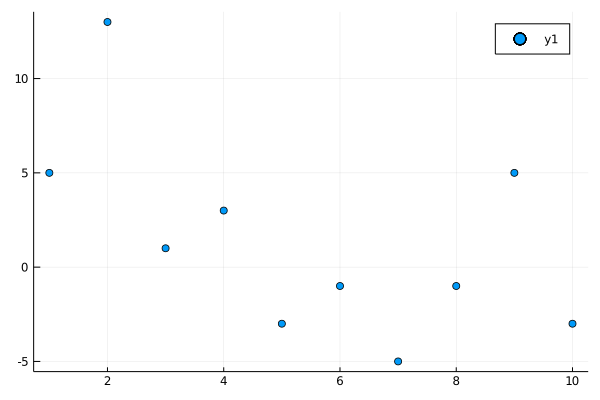

In [67]:
scatter(final_positions)

In [84]:
n = 20
num_walkers = 10000
walkers = [trajectory(n) for i in 1:num_walkers] 

last_positions = [traj[end] for traj in walkers]

scatter(last_positions)

In [72]:
using StatsBase

In [85]:
my_counts = countmap(last_positions)

Dict{Int64,Int64} with 16 entries:
  -11 => 70
  -1  => 1769
  -7  => 529
  11  => 77
  -15 => 4
  7   => 503
  9   => 218
  -3  => 1443
  -9  => 219
  3   => 1379
  -13 => 18
  5   => 965
  13  => 11
  -5  => 961
  15  => 2
  1   => 1832

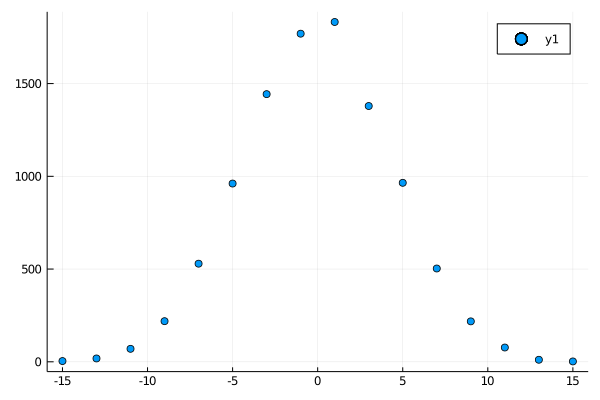

In [86]:
scatter(my_counts)